### **STROKE PREDICTION DATASET** ##


## **Overview**
**Project Objective**

The objective of this project is to predict the likelihood of stroke occurrences in patients using machine learning classification models. By leveraging data science techniques, we aim to build, evaluate, and optimize models to assist healthcare providers in identifying high-risk individuals and potentially save lives through early intervention.



**Business Understanding**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Attribute Information


**Libraries required**

In [75]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
except ImportError:
    print("XGBoost is not installed. You can install it using 'pip install xgboost'.")

# Model evaluation and selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





XGBoost is not installed. You can install it using 'pip install xgboost'.


Data Manipulation and Analysis

In this project, we are using a dataset provided by the World Health Organization (WHO) to predict the likelihood of a patient experiencing a stroke. 
The dataset includes various attributes related to patient demographics, health conditions, and lifestyle factors. 
Effective data manipulation and analysis are critical to preparing the dataset for machine learning models.

1. Loading the Dataset:
We start by loading the dataset using Pandas, which provides powerful data manipulation capabilities.
The dataset contains the following columns:

a) id: A unique identifier for each patient.
b) gender: The gender of the patient, which can be "Male", "Female", or "Other".
c) age: The age of the patient.
d) hypertension: A binary indicator (0 or 1) of whether the patient has hypertension.
e) heart_disease: A binary indicator (0 or 1) of whether the patient has any heart diseases.
f) ever_married: Indicates if the patient has ever been married ("Yes" or "No").
d) work_type: The type of work the patient does, such as "children", "Govt_job", "Never_worked", "Private", or "Self-employed".
h) Residence_type: Whether the patient lives in a "Rural" or "Urban" area.
i) avg_glucose_level: The average glucose level in the patient’s blood.
j) bmi: The body mass index of the patient.
k) smoking_status: The smoking status of the patient, which can be "formerly smoked", "never smoked", "smokes", or "Unknown".
l) stroke: The target variable, which indicates whether the patient has experienced a stroke (1) or not (0).

In [10]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


1. Display Basic Information About the DataFrame

It's essential to understand the structure and content of your dataset. 
Use the following commands to display basic information and check for missing values:

In [143]:
# Display the first few rows of the dataframe
df.head()

# Display the summary information of the dataframe
df.info()

# Display basic statistics of the dataframe
df.describe()

# Check for missing values
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   avg_glucose_level  4908 non-null   float64
 5   bmi                4908 non-null   float64
 6   stroke             4908 non-null   int64  
 7   gender_1           4908 non-null   bool   
 8   ever_married_1     4908 non-null   bool   
 9   work_type_1        4908 non-null   bool   
 10  work_type_2        4908 non-null   bool   
 11  work_type_3        4908 non-null   bool   
 12  work_type_4        4908 non-null   bool   
 13  Residence_type_1   4908 non-null   bool   
 14  smoking_status_1   4908 non-null   bool   
 15  smoking_status_2   4908 non-null   bool   
 16  smoking_status_3   4908 non-n

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender_1             0
ever_married_1       0
work_type_1          0
work_type_2          0
work_type_3          0
work_type_4          0
Residence_type_1     0
smoking_status_1     0
smoking_status_2     0
smoking_status_3     0
dtype: int64

2. ## **Data Cleaning**

Identify and handle missing values, inconsistencies, incorrect data types and outliers.

In [158]:
# Handling missing values
#Replace missing values in 'bmi' with the mean value
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# For 'smoking_status', replace 'Unknown' with a new category
df['smoking_status_1'].replace('Unknown', 'Unknown_status', inplace=True)


3. ### **Exploratory Data Analysis (EDA)**

Perform EDA to understand the distribution of variables and relationships between them.

**Inferential Statistics**

Objective:
Identify significant relationships between features and the target variable (stroke occurrence).
Calculate the correlation matrix to identify linear relationships between numerical features and the target variable.

In [160]:
correlation_matrix = df.corr()
print(correlation_matrix)


                         id       age  hypertension  heart_disease  \
id                 1.000000  0.009124      0.001206       0.004058   
age                0.009124  1.000000      0.274395       0.257104   
hypertension       0.001206  0.274395      1.000000       0.115978   
heart_disease      0.004058  0.257104      0.115978       1.000000   
avg_glucose_level  0.006252  0.236000      0.180614       0.154577   
bmi                0.003238  0.333314      0.167770       0.041322   
stroke             0.004878  0.232313      0.142503       0.137929   
gender_1           0.006474 -0.030280      0.021811       0.082950   
ever_married_1     0.017099  0.680742      0.162350       0.111203   
work_type_1        0.003880 -0.079399     -0.021345      -0.015315   
work_type_2        0.026342  0.120169     -0.004581      -0.000239   
work_type_3       -0.021778  0.327306      0.111770       0.081466   
work_type_4       -0.019801 -0.635044     -0.126590      -0.088092   
Residence_type_1   0

**Interpretation of the matrix above**
The correlation matrix shows the correlation coefficients between different features in your dataset. 
**Positive Correlations**

Age and Ever Married: 0.680742
Older age is positively correlated with being married.

Age and BMI: 0.333314
Older age is positively correlated with higher BMI.

Age and Hypertension: 0.274395
Older age is positively correlated with hypertension.

Age and Heart Disease: 0.257104
Older age is positively correlated with heart disease.

Age and Avg Glucose Level: 0.236000
Older age is positively correlated with higher average glucose levels.

**Negative Correlations**

Age and Gender_1: -0.030280
There is a slight negative correlation between age and gender (likely encoded as a binary variable where 1 indicates male).

Work Type 1 and Age: -0.079399
Work type 1 has a negative correlation with age.

Other Correlations
Hypertension and Age: 0.274395
Heart Disease and Age: 0.257104
Avg Glucose Level and Age: 0.236000
BMI and Age: 0.333314

These correlations give insights into how different features relate to each other in the Stroke_detection_dataset. For instance, age is positively correlated with hypertension, heart disease, average glucose level, and BMI. This suggests that older individuals tend to have higher average glucose levels, higher BMI, and are more likely to have hypertension and heart disease.

**Chi-Square Test:**
Perform the Chi-Square test for independence to determine if there is a significant association between categorical features and the target variable.

In [156]:
from scipy.stats import chi2_contingency
import pandas as pd

# Creating contingency tables for each smoking status category and stroke
cont_table_1 = pd.crosstab(df['smoking_status_1'], df['stroke'])
cont_table_2 = pd.crosstab(df['smoking_status_2'], df['stroke'])
cont_table_3 = pd.crosstab(df['smoking_status_3'], df['stroke'])

# Performing the Chi-Square test for smoking_status_1
chi2_1, p_1, dof_1, ex_1 = chi2_contingency(cont_table_1)
print("Results for smoking_status_1:")
print("Chi-Square Statistic:", chi2_1)
print("p-value:", p_1)
print("Degrees of Freedom:", dof_1)
print("Expected Frequencies:")
print(ex_1)
print()

# Performing the Chi-Square test for smoking_status_2
chi2_2, p_2, dof_2, ex_2 = chi2_contingency(cont_table_2)
print("Results for smoking_status_2:")
print("Chi-Square Statistic:", chi2_2)
print("p-value:", p_2)
print("Degrees of Freedom:", dof_2)
print("Expected Frequencies:")
print(ex_2)
print()

# Performing the Chi-Square test for smoking_status_3
chi2_3, p_3, dof_3, ex_3 = chi2_contingency(cont_table_3)
print("Results for smoking_status_3:")
print("Chi-Square Statistic:", chi2_3)
print("p-value:", p_3)
print("Degrees of Freedom:", dof_3)
print("Expected Frequencies:")
print(ex_3)




Results for smoking_status_1:
Chi-Square Statistic: 15.447109693652274
p-value: 8.48466010132926e-05
Degrees of Freedom: 1
Expected Frequencies:
[[3898.599837  173.400163]
 [ 800.400163   35.599837]]

Results for smoking_status_2:
Chi-Square Statistic: 0.4570053588667822
p-value: 0.4990268583223936
Degrees of Freedom: 1
Expected Frequencies:
[[2925.86471068  130.13528932]
 [1773.13528932   78.86471068]]

Results for smoking_status_3:
Chi-Square Statistic: 1.9829783598166784
p-value: 0.1590769940818442
Degrees of Freedom: 1
Expected Frequencies:
[[3993.38406683  177.61593317]
 [ 705.61593317   31.38406683]]


**The results of the Chi-test indicate the following:**
**Smoking_status_1:** The Chi-Square statistic of 15.447 indicates a considerable deviation between the observed and expected frequencies.
The p-value of 8.485e-05 is significantly lower than the typical alpha level of 0.05, suggesting a strong statistical significance.
Conclusion: There is a statistically significant association between smoking_status_1 and stroke occurrence. This means that whether someone falls into smoking_status_1 significantly affects their likelihood of having a stroke.

**Smoking_status_2:** The Chi-Square statistic of 0.457 suggests a small deviation between the observed and expected frequencies.
The p-value of 0.499 is much higher than 0.05, indicating a lack of statistical significance.
Conclusion: There is no statistically significant association between smoking_status_2 and stroke occurrence. This means that smoking_status_2 does not significantly affect the likelihood of having a stroke.

**Smoking_status_3:** The Chi-Square statistic of 1.983 indicates a moderate deviation between the observed and expected frequencies.
The p-value of 0.159 is higher than 0.05 but not extremely so, suggesting that the result is not statistically significant at the 0.05 level.
Conclusion: There is no statistically significant association between smoking_status_3 and stroke occurrence at the 0.05 level. However, the result is close to significance, indicating that smoking_status_3 might have a weak effect that could be explored further with more data.

**Overall Conclusion:**
Among the three smoking status categories, **only smoking_status_1** shows a **statistically significant** association with stroke occurrence. This suggests that specific smoking behaviors or categorizations represented by smoking_status_1 significantly impact stroke risk, while the other smoking status categories (smoking_status_2 and smoking_status_3) do not show significant associations.


**T-Tests and ANOVA:**
Conduct T-tests (for two groups) and ANOVA (for more than two groups) to compare the means of numerical features between different groups of the target variable.

In [157]:
import pandas as pd
from scipy.stats import ttest_ind

# Creating groups
stroke_group = df[df['stroke'] == 1]
no_stroke_group = df[df['stroke'] == 0]

# T-Test for Age
t_stat_age, p_val_age = ttest_ind(stroke_group['age'], no_stroke_group['age'])
print("T-Test for Age:")
print("T-Statistic:", t_stat_age)
print("p-value:", p_val_age)
print()

# T-Test for Average Glucose Level
t_stat_glucose, p_val_glucose = ttest_ind(stroke_group['avg_glucose_level'], no_stroke_group['avg_glucose_level'])
print("T-Test for Average Glucose Level:")
print("T-Statistic:", t_stat_glucose)
print("p-value:", p_val_glucose)
print()

# T-Test for BMI
t_stat_bmi, p_val_bmi = ttest_ind(stroke_group['bmi'], no_stroke_group['bmi'])
print("T-Test for BMI:")
print("T-Statistic:", t_stat_bmi)
print("p-value:", p_val_bmi)
print()


T-Test for Age:
T-Statistic: 16.729567089327805
p-value: 3.8408903844891174e-61

T-Test for Average Glucose Level:
T-Statistic: 9.830215360205344
p-value: 1.3476353968167712e-22

T-Test for BMI:
T-Statistic: 2.968365485973205
p-value: 0.0030083559555263975



**T-Test for Age:**
The T-statistic of 16.73 indicates a **large difference in the mean age** between the stroke and no stroke groups.
The p-value of 3.84e-61 is extremely small, much less than the typical significance level of 0.05.
Conclusion: There is a highly significant difference in age between patients who had a stroke and those who did not. **On average, patients who had a stroke are significantly older than those who did not.**

**T-Test for Average Glucose Level:**
The T-statistic of 9.83 indicates a **large difference in the mean average glucose level** between the stroke and no stroke groups.
The p-value of 1.35e-22 is extremely small, indicating strong statistical significance.
Conclusion: There is a highly significant difference in average glucose levels between patients who had a stroke and those who did not. **On average, patients who had a stroke have significantly higher average glucose levels.**

**T-Test for BMI:**
The T-statistic of 2.97 indicates a **moderate difference in the mean** BMI between the stroke and no stroke groups.
The p-value of 0.003 is less than 0.05, indicating statistical significance.
Conclusion: There is a statistically significant difference in BMI between patients who had a stroke and those who did not. **On average, patients who had a stroke have a different BMI compared to those who did not, but this effect is smaller compared to age and average glucose level.**

**Overall Interpretation**
Age and Average Glucose Level show very strong evidence of association with stroke occurrence, with highly significant differences between the stroke and no stroke groups.
BMI also shows a significant difference between the groups, but the effect size is smaller compared to age and average glucose level.

**ANOVA for Numerical Features (More Than Two Groups)**
Since age, avg_glucose_level, and bmi are continuous variables, we do not need to conduct ANOVA in this specific context. However, for completeness, here is an example of how to perform ANOVA using the work_type feature (if it had multiple levels).

In [159]:
from scipy.stats import f_oneway

# ANOVA for Age across Work Types
f_stat_age, p_val_age_work_type = f_oneway(
    df[df['work_type_1'] == 1]['age'],
    df[df['work_type_2'] == 1]['age'],
    df[df['work_type_3'] == 1]['age'],
    df[df['work_type_4'] == 1]['age']
)
print("ANOVA for Age across Work Types:")
print("F-Statistic:", f_stat_age)
print("p-value:", p_val_age_work_type)
print()


ANOVA for Age across Work Types:
F-Statistic: 1346.1771056072907
p-value: 0.0



**ANOVA for Age across Work Types:**
The F-Statistic of 1346.18 is very large, indicating a significant difference in mean age across different work types.
The p-value is 0.0, which is less than the typical significance level of 0.05.
Conclusion: There is a highly significant difference in age across different work types.

**What the Results Mean:** F-Statistic: The large F-value indicates that the variation in age between different work types is much larger than the variation within each work type.
p-value: The very small p-value indicates that the observed differences in age across work types are highly unlikely to be due to random chance.

**Practical Implications:** This result suggests that the type of work a person does significantly influences their age.
The ANOVA results indicate a highly significant association between age and work type, suggesting that age varies significantly across different types of work.

3.1.**Visualize Distributions** 

    Visualize Data to Uncover Patterns and Insights
    Here we shall create visualizations to reveal patterns, trends, and insights in the data.

Below we shall use Histograms to help us understand the distribution of numerical features. Let's plot histograms for each numerical feature in the dataset.


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


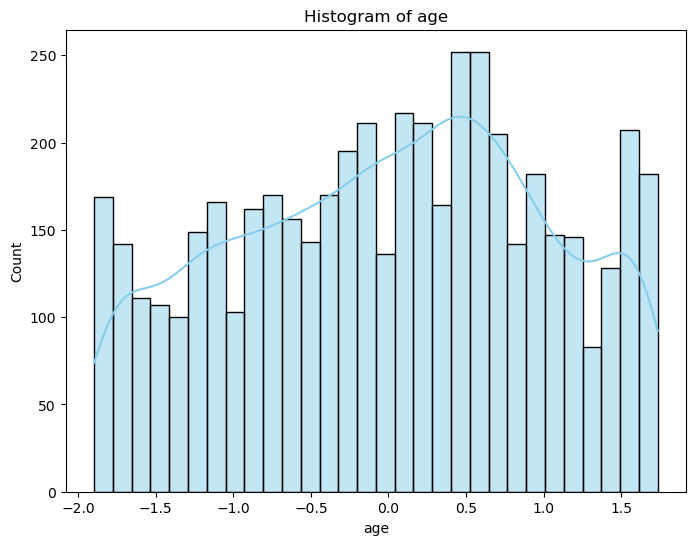

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


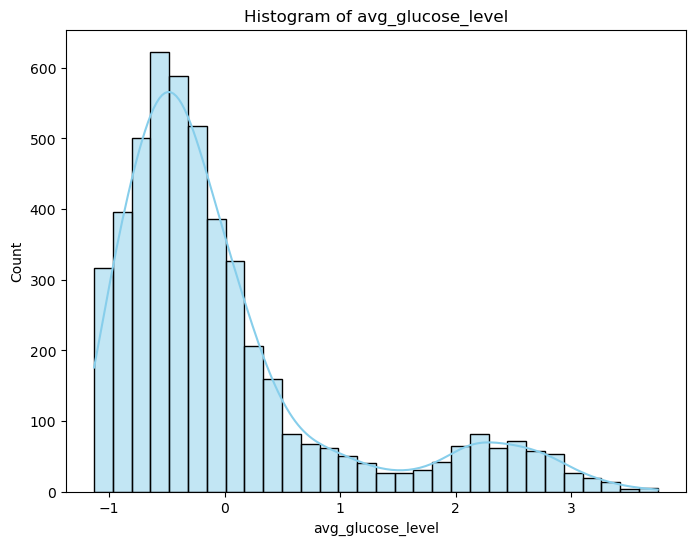

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


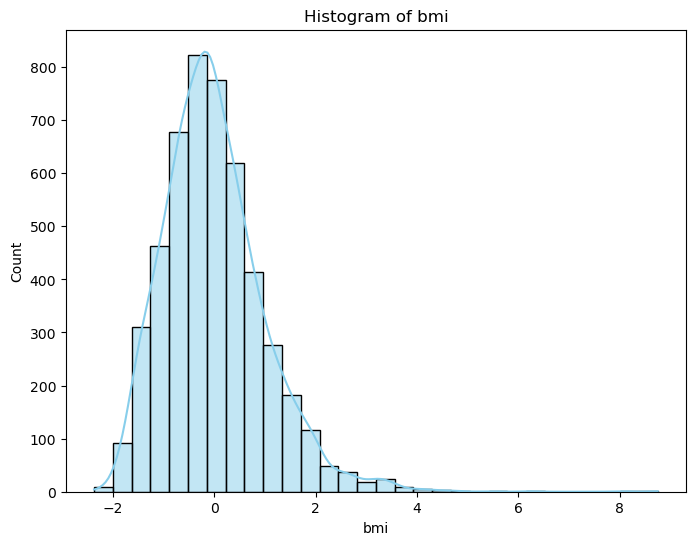

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


C:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


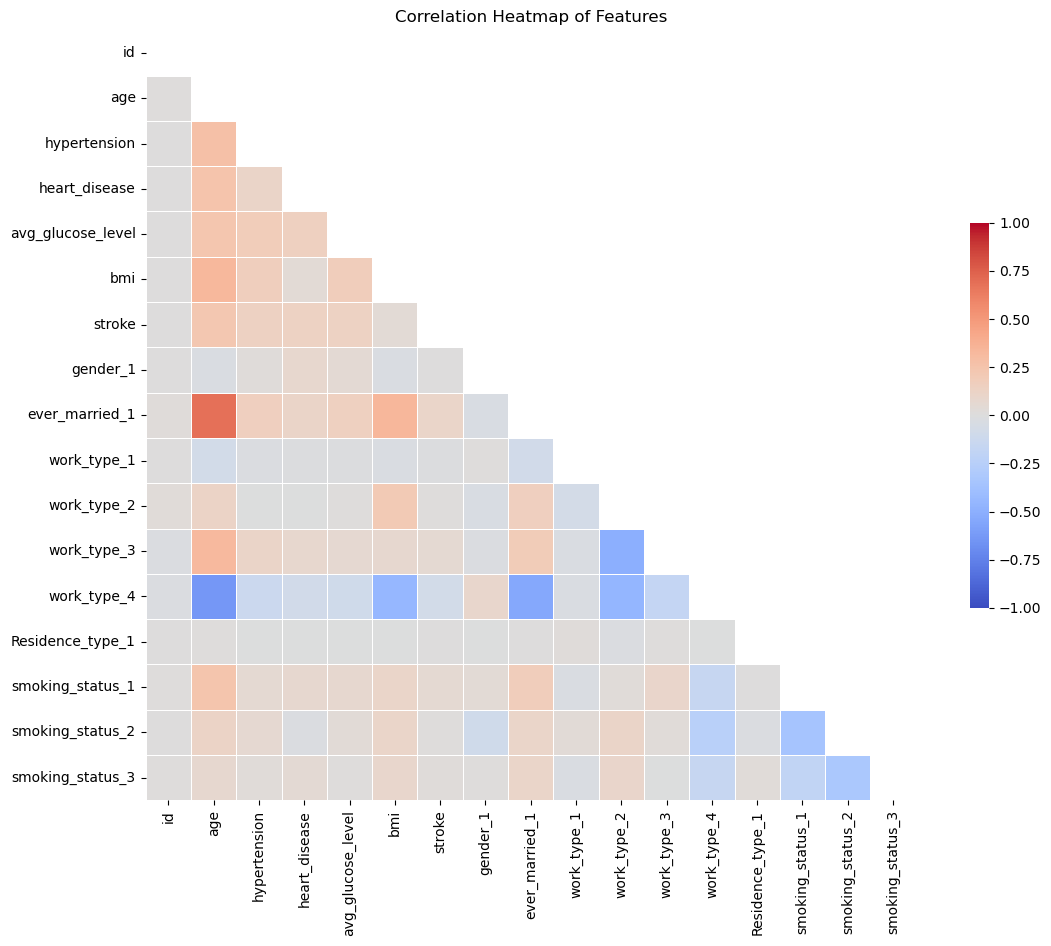

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Features')
plt.show()


The heatmap above visualizes the correlation matrix. Each cell in the heatmap shows the correlation coefficient between two variables. The color intensity and annotation (the numerical value) represent the strength and direction of the correlation.

4. ###  Data Transformation

Transform the data into a suitable format for modeling. This includes encoding categorical variables and scaling numerical features.

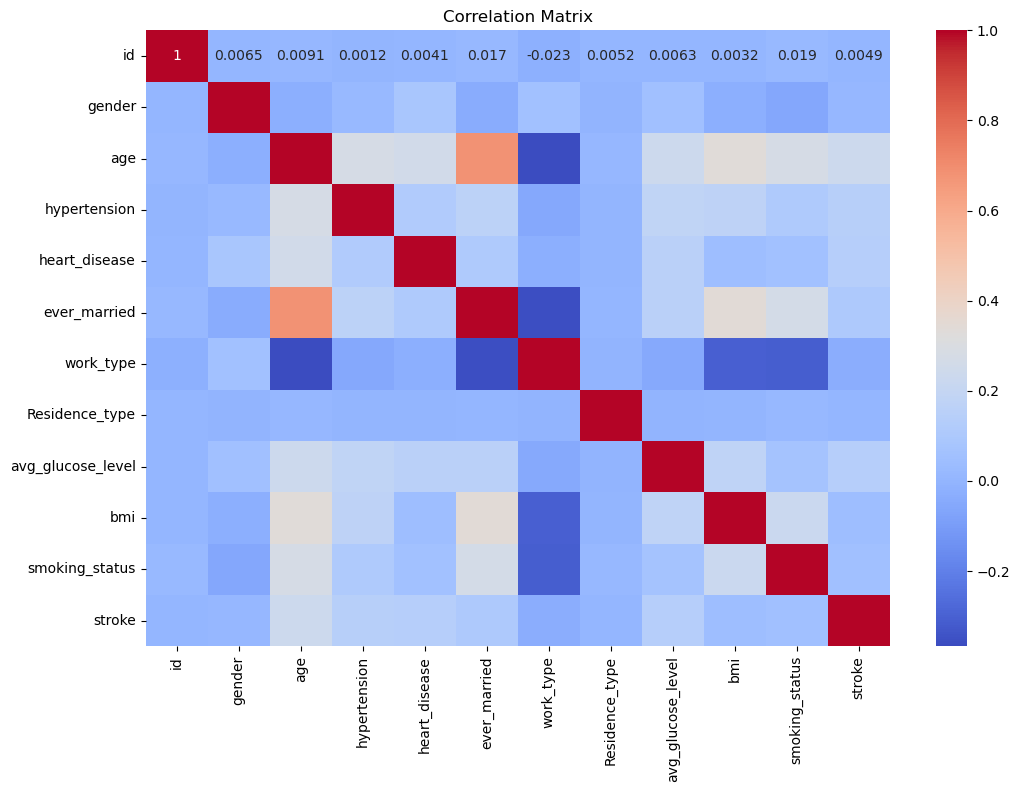

In [81]:
# Heatmap to show correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The heatmap plotted above shows the correlation matrix between the numerical features in the dataset, ie:
Age has moderate positive correlations with BMI, hypertension, heart disease, and average glucose level.
BMI has moderate positive correlations with age, ever_married, and work_type_2.
Hypertension and Heart Disease show moderate positive correlations with age and each other.
Average Glucose Level has moderate positive correlations with age and hypertension.
Ever Married has a strong positive correlation with age.
Work Type features have various correlations with age and each other.

**Outliers Detection**:
To visualize the spread and outliers of numerical features across different categories of the target variable, we use box plots. This will help us understand how the distribution of numerical features varies with respect to whether the patient had a stroke or not.

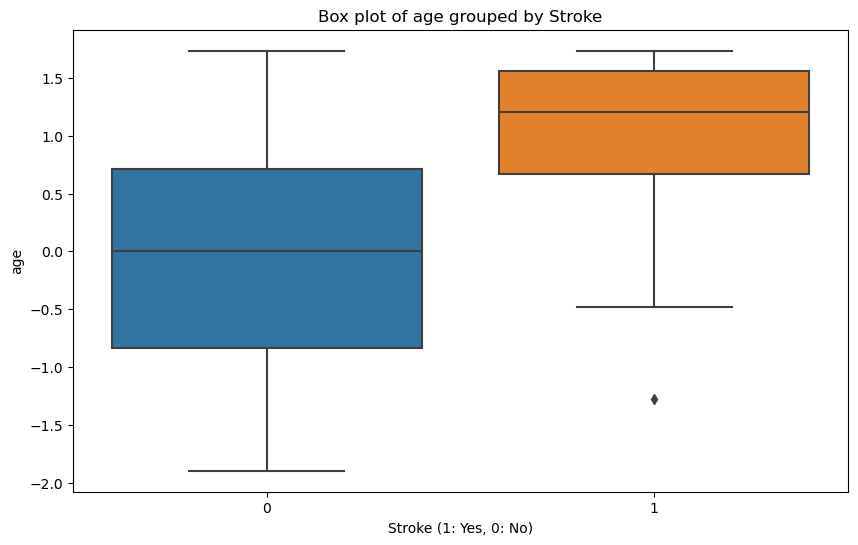

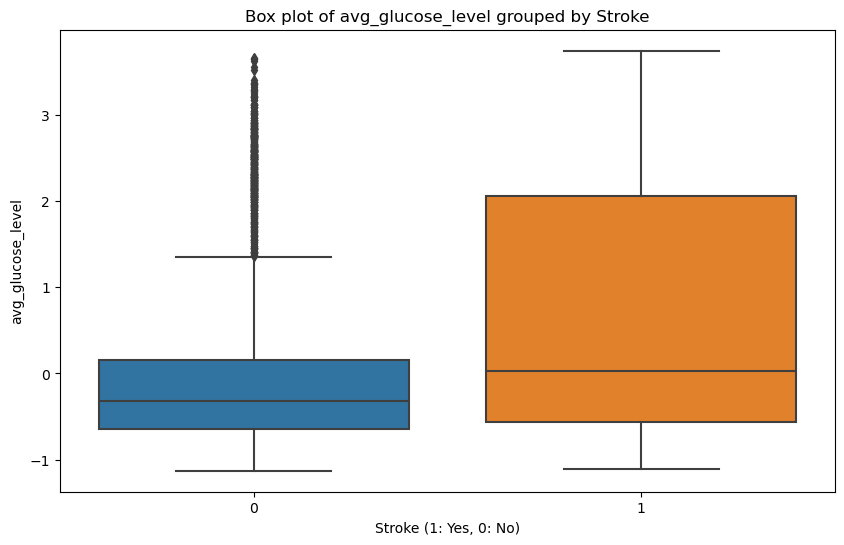

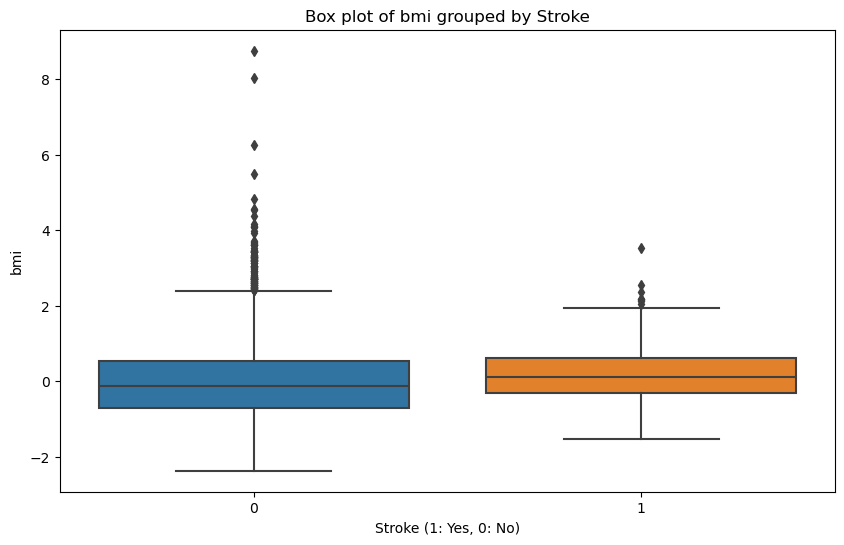

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Create box plots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='stroke', y=feature, data=df)
    plt.title(f'Box plot of {feature} grouped by Stroke')
    plt.xlabel('Stroke (1: Yes, 0: No)')
    plt.ylabel(feature)
    plt.show()


**Visualize relationships between multiple numerical features**
Creating **pair plots** is a great way to visualize relationships between multiple numerical features. This will allow us to see both the distributions of individual features and the relationships between pairs of features. 

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


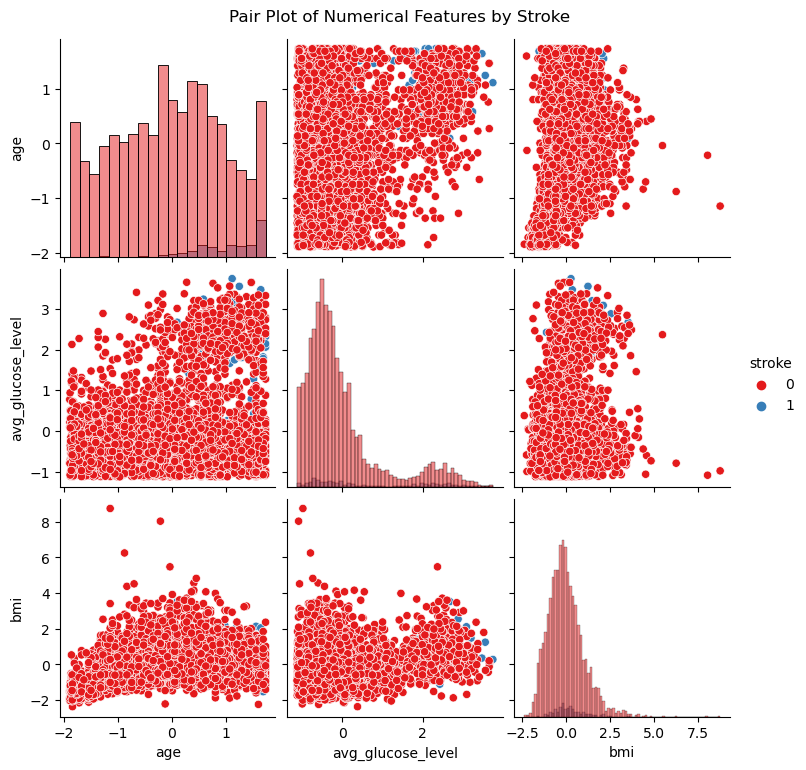

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Add 'stroke' to the features to see its relationship with others
features = numerical_features + ['stroke']

# Create pair plots
sns.pairplot(df[features], hue='stroke', diag_kind='hist', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features by Stroke', y=1.02)
plt.show()


**Below we are visualizing relationships between pairs of numerical features using scatter plots.**

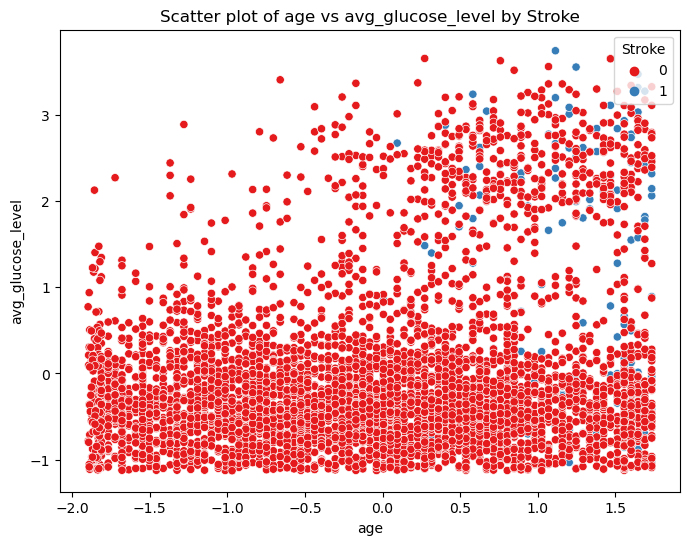

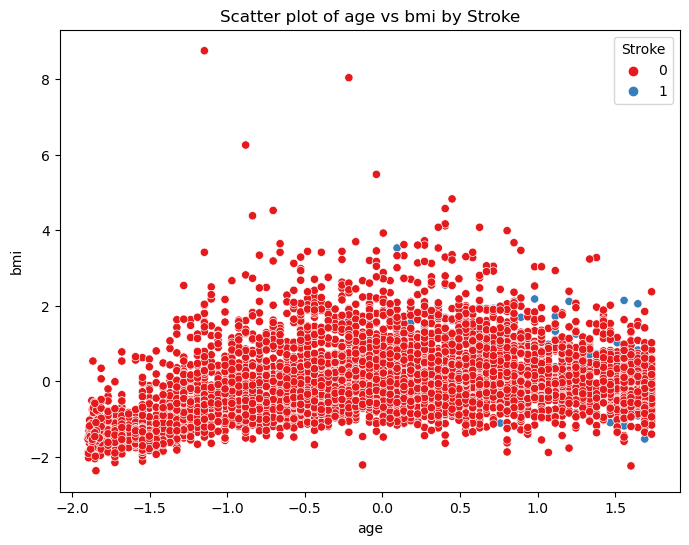

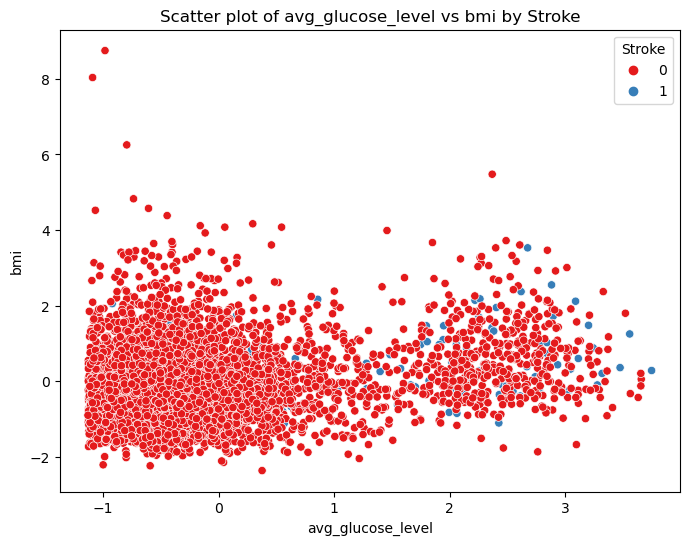

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot scatter plots for each pair of numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_features[i], y=numerical_features[j], hue='stroke', data=df, palette='Set1')
        plt.title(f'Scatter plot of {numerical_features[i]} vs {numerical_features[j]} by Stroke')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.legend(title='Stroke', loc='upper right')
        plt.show()


To visualize the distribution of categorical features we shall use Bar graphs. Let's create bar plots for each of the categorical features in the dataset below.

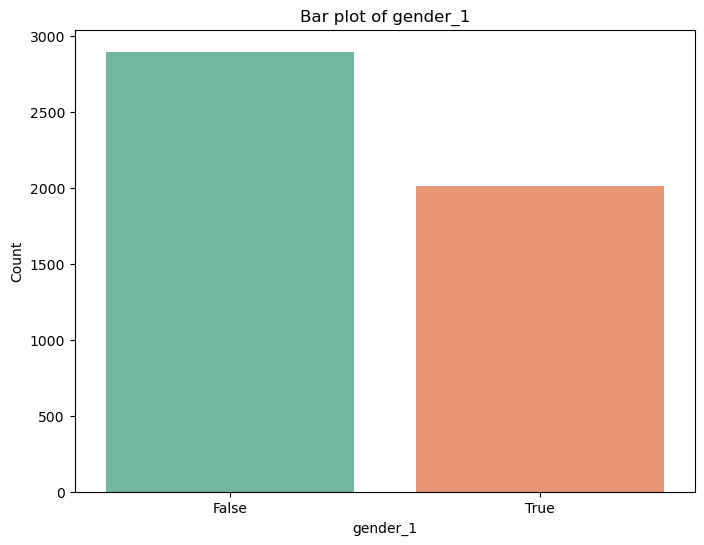

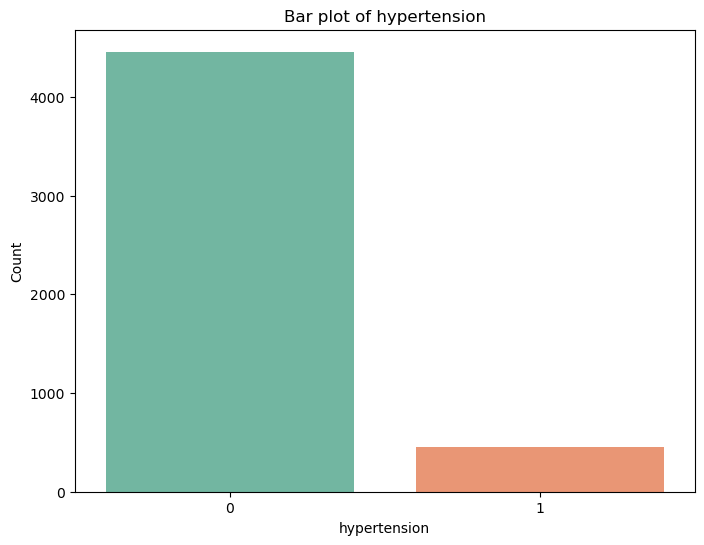

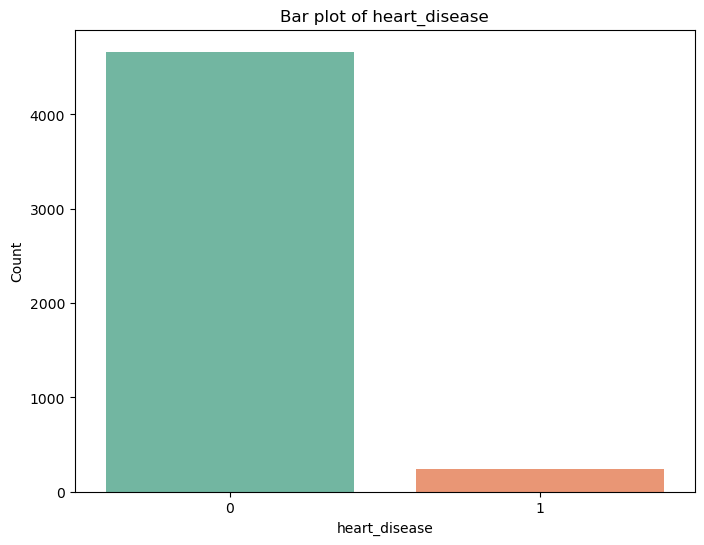

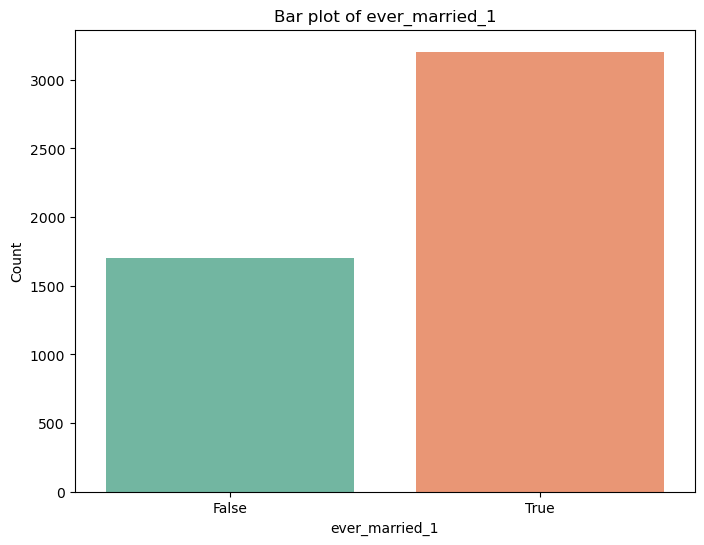

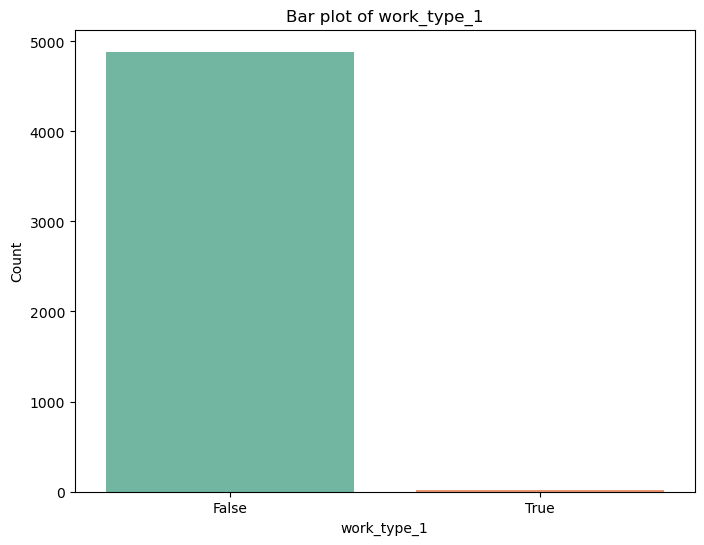

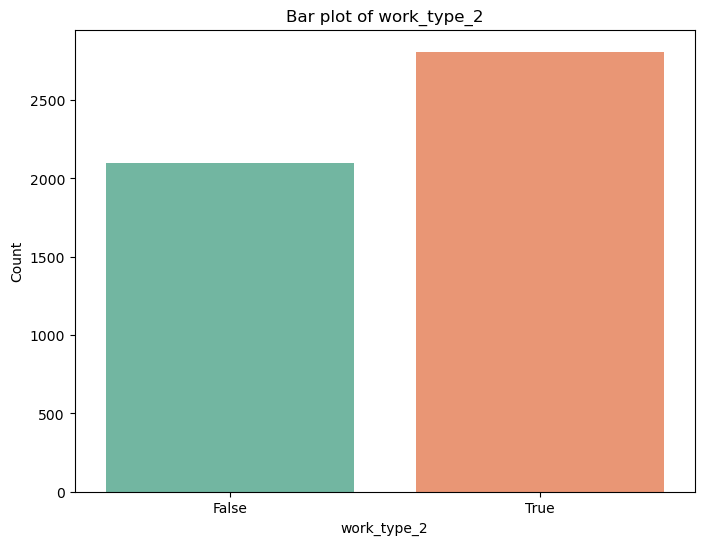

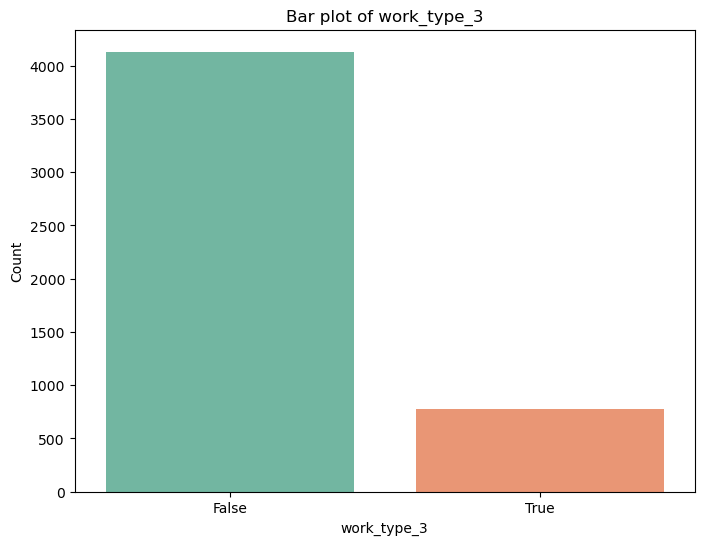

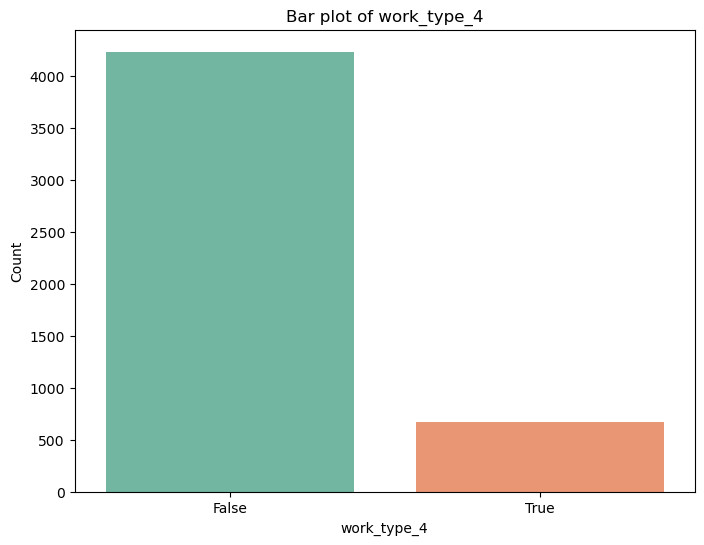

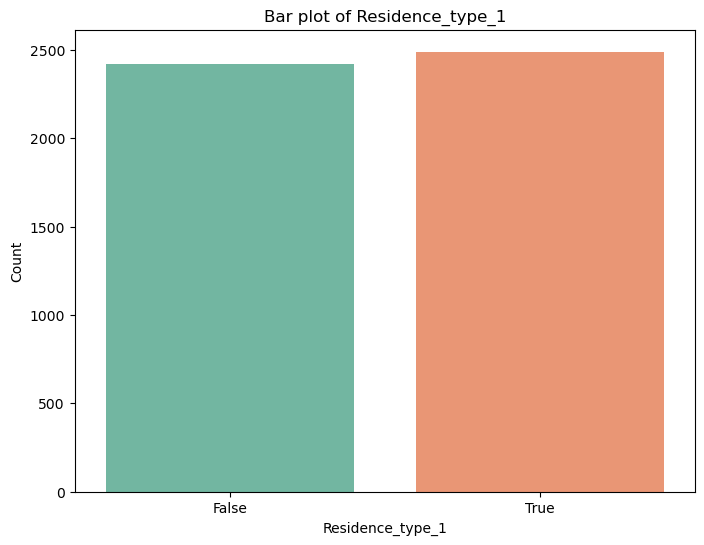

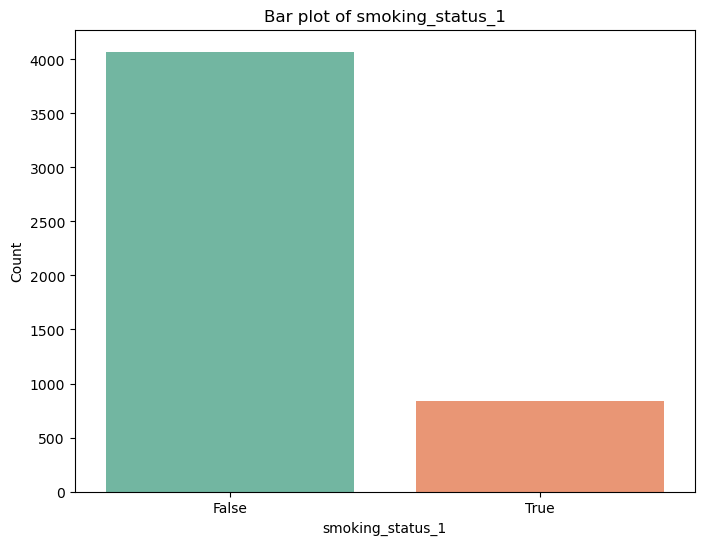

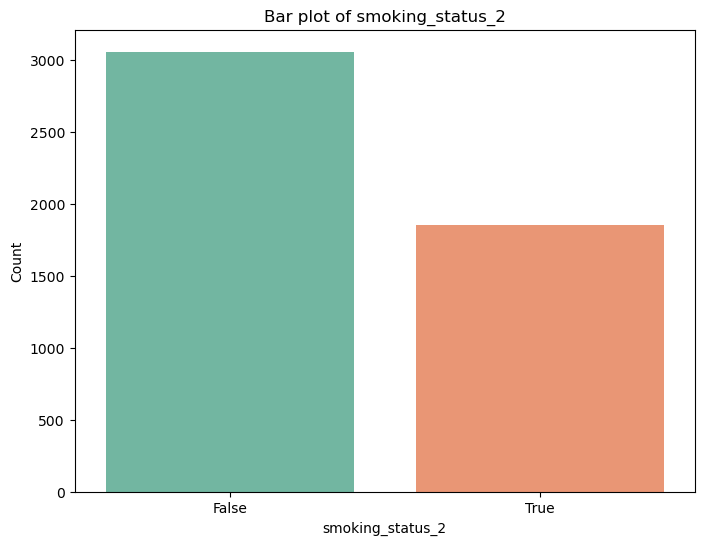

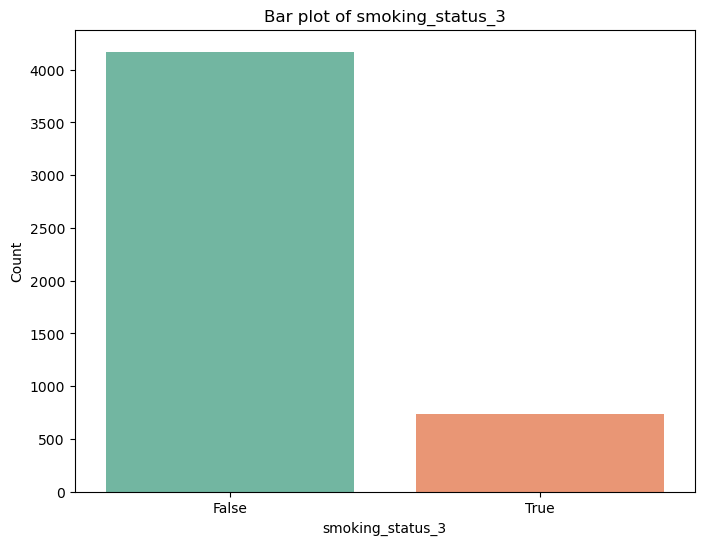

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features
categorical_features = ['gender_1', 'hypertension', 'heart_disease', 
                        'ever_married_1', 'work_type_1', 'work_type_2', 
                        'work_type_3', 'work_type_4', 'Residence_type_1', 
                        'smoking_status_1', 'smoking_status_2', 'smoking_status_3']

# Create bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


4.1. **Encoding Categorical Variables**
Encoding categorical variables is an essential step in preparing your data for machine learning models. Let's proceed to encoding the categorical variables in the dataset. 

4.2. Scaling Numerical Features

In [179]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df contains your DataFrame with the specified columns

# Define categorical features to be one-hot encoded
categorical_features = ['gender_1', 'ever_married_1', 'work_type_1', 'work_type_2', 
                        'work_type_3', 'work_type_4', 'Residence_type_1', 
                        'smoking_status_1', 'smoking_status_2', 'smoking_status_3']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Encode the categorical columns and store them in a DataFrame
encoded_columns = pd.DataFrame(encoder.fit_transform(df[categorical_features]))

# Get feature names from encoder categories
feature_names = encoder.get_feature_names_out(categorical_features)

# Assign feature names to the encoded DataFrame columns
encoded_columns.columns = feature_names

# Concatenate the original DataFrame and the encoded columns
df_encoded = pd.concat([df, encoded_columns], axis=1)

# Drop the original categorical columns
df_encoded.drop(columns=categorical_features, inplace=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())





        id       age  hypertension  heart_disease  avg_glucose_level  \
0   9046.0  1.069938           0.0            1.0           2.777797   
2  31112.0  1.646336           0.0            1.0           0.014016   
3  60182.0  0.271847           0.0            0.0           1.484266   
4   1665.0  1.601998           1.0            0.0           1.549325   
5  56669.0  1.690675           0.0            0.0           1.821493   

        bmi  stroke  gender_1_True  ever_married_1_True  work_type_1_True  \
0  0.981145     1.0            1.0                  1.0               0.0   
2  0.459086     1.0            0.0                  1.0               0.0   
3  0.701016     1.0            0.0                  1.0               0.0   
4 -0.623231     1.0            1.0                  1.0               0.0   
5  0.013426     1.0            1.0                  1.0               0.0   

   work_type_2_True  work_type_3_True  work_type_4_True  \
0               1.0               0.0        

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [180]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(StandardScaler)


<class 'sklearn.preprocessing._data.StandardScaler'>


5. ### Splitting the Data

We shall start by splitting our data into training and testing sets. This is crucial to evaluate how well our models generalize to unseen data.

In [181]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [182]:
print(X_train.columns)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')


6. ### Building Baseline Models

    We shall start with simple, interpretable models like Logistic Regression and Decision Tree.

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

6.1 Evaluating Baseline Models

Evaluate the performance of our baseline models using various metrics.

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Logistic Regression
print("Logistic Regression Model Performance")
evaluate_model(log_reg, X_test, y_test)

# Evaluate Decision Tree
print("\nDecision Tree Model Performance")
evaluate_model(decision_tree, X_test, y_test)


Logistic Regression Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982


Decision Tree Model Performance
Accuracy: 0.9175152749490835
Precision: 0.0851063829787234
Recall: 0.09523809523809523
F1 Score: 0.08988764044943819
ROC AUC Score: 0.5247467071935158

Confusion Matrix:
 [[897  43]
 [ 38   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       940
           1       0.09      0.10      0.09        42

    accuracy                           0.92       982
   macro

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

7. Building More Complex Models

We shall create more advanced models such as Random Forest and Gradient Boosting for our data.

In [185]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Gradient Boosting Model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

7.1. Hyperparameter Tuning

Optimize the hyperparameters of our models using GridSearchCV or RandomizedSearchCV.

In [188]:
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_random_forest = grid_search.best_estimator_

# Evaluate the tuned model
print("\nTuned Random Forest Model Performance")
evaluate_model(best_random_forest, X_test, y_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuned Random Forest Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

8. Final Model Evaluation

Evaluate the final models on the testing set and compare their performance.

In [187]:
# Evaluate Gradient Boosting
print("\nGradient Boosting Model Performance")
evaluate_model(gradient_boosting, X_test, y_test)

# Evaluate the best Random Forest model from GridSearchCV
print("\nBest Random Forest Model Performance")
evaluate_model(best_random_forest, X_test, y_test)



Gradient Boosting Model Performance
Accuracy: 0.9531568228105907
Precision: 0.16666666666666666
Recall: 0.023809523809523808
F1 Score: 0.041666666666666664
ROC AUC Score: 0.5092451874366767

Confusion Matrix:
 [[935   5]
 [ 41   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.17      0.02      0.04        42

    accuracy                           0.95       982
   macro avg       0.56      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982


Best Random Forest Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
 

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

9. ### Feature Scaling (if necessary):

    K-Nearest Neighbors (KNN) is sensitive to the scale of the data. It's often beneficial to scale your features.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


9.1 Initialize the KNN Classifier:

In [189]:
classifier = KNeighborsClassifier(n_neighbors=5)


9.2 Train the Model

In [193]:
classifier.fit(X_train, y_train)


KNeighborsClassifier()

9.3 Make Predictions

In [194]:
y_pred = classifier.predict(X_test)


9.4 Evaluate the Model:

In [102]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[937   3]
 [ 41   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.25      0.02      0.04        42

    accuracy                           0.96       982
   macro avg       0.60      0.51      0.51       982
weighted avg       0.93      0.96      0.94       982



9.5 Tuning the Model:

We shall use GridSearchCV to find the best parameters for our model.

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.952 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.954 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.945 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.943 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 to

9.5.1. Conclusion based on the results from the cross-validation, the K-Nearest Neighbors model with the following parameters performs the best:

    Distance Metric: Manhattan
    Number of Neighbors: 7
    Weights: Uniform

Here's a summary of the performance:

    Mean Accuracy: Around 95.8%

This indicates that the model achieves an average accuracy of approximately 95.8% across different folds. This performance is quite good and suggests that the model is effective for our classification task.

10. ## Strategies to Iterate and Improve Performance:
We shall adjust n_neighbors:    
n_neighbors controls how many neighbors will cast a vote in the prediction. 
We shall test different values to find the optimal balance between bias and variance.

In [104]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.952 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.954 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.945 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.950 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.957 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.959 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.958 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.954 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.952 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

10.1 Explore Different Distance Metrics:

    The choice of distance metric (metric) can significantly impact the model's performance. 
    We shall experiment with different metrics such as 'euclidean', 'manhattan', 'chebyshev'.

In [105]:
param_grid = {'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..................metric=euclidean;, score=0.950 total time=   0.0s
[CV 2/5] END ..................metric=euclidean;, score=0.957 total time=   0.0s
[CV 3/5] END ..................metric=euclidean;, score=0.959 total time=   0.0s
[CV 4/5] END ..................metric=euclidean;, score=0.958 total time=   0.0s
[CV 5/5] END ..................metric=euclidean;, score=0.954 total time=   0.0s
[CV 1/5] END ..................metric=manhattan;, score=0.954 total time=   0.0s
[CV 2/5] END ..................metric=manhattan;, score=0.958 total time=   0.0s
[CV 3/5] END ..................metric=manhattan;, score=0.958 total time=   0.0s
[CV 4/5] END ..................metric=manhattan;, score=0.959 total time=   0.0s
[CV 5/5] END ..................metric=manhattan;, score=0.955 total time=   0.0s
[CV 1/5] END ..................metric=chebyshev;, score=0.947 total time=   0.0s
[CV 2/5] END ..................metric=chebyshev;,

10.2 Weights of Neighbors:

    We shall adjust how neighbors contribute to the decision. 'uniform' weights all neighbors equally, while 'distance' weights neighbors by the inverse of their distance.

In [106]:
param_grid = {'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................weights=uniform;, score=0.950 total time=   0.0s
[CV 2/5] END ...................weights=uniform;, score=0.957 total time=   0.0s
[CV 3/5] END ...................weights=uniform;, score=0.959 total time=   0.0s
[CV 4/5] END ...................weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END ...................weights=uniform;, score=0.954 total time=   0.0s
[CV 1/5] END ..................weights=distance;, score=0.947 total time=   0.0s
[CV 2/5] END ..................weights=distance;, score=0.955 total time=   0.0s
[CV 3/5] END ..................weights=distance;, score=0.952 total time=   0.0s
[CV 4/5] END ..................weights=distance;, score=0.955 total time=   0.0s
[CV 5/5] END ..................weights=distance;, score=0.950 total time=   0.0s
{'weights': 'uniform'}


11. ### Cross-validation:

    Use cross-validation to get a more robust estimate of our model's performance and to avoid overfitting.

In [108]:
#Feature Scaling to ensure our features are properly scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)
print(scores)
print(f"Mean cross-validation accuracy: {scores.mean()}")


[0.95038168 0.9566879  0.95923567 0.95796178 0.95414013]
Mean cross-validation accuracy: 0.9556814314192639


11.1 Ensemble Methods:

    We shall ensemble methods like Bagging or Boosting to improve performance and reduce overfitting.

In [110]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=0)
bagging.fit(X_train_scaled, y_train)


C:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0)

11.2 Dimensionality Reduction:

    We shall consider Dimensionality Reductions because we have high-dimensional data, like using techniques like Principal Component Analysis (PCA) before applying KNN.

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


11.3. The Iteration Process:

    We shall use GridSearchCV to help in finding the optimal hyperparameters for the KNN classifier on the stroke prediction dataset, improving the accuracy of stroke likelihood predictions.
    
    We shall use the StandardScaler to ensure that all features in the stroke prediction dataset contribute equally to the distance computations performed by the KNN algorithm, leading to more accurate predictions.
    
    We shall use PCA to reduce the dimensionality of the stroke prediction dataset, potentially improving both the computational efficiency and the generalization capability of the KNN classifier.

In [113]:
#Full Iteration Process
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for optimal parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)

# Print best parameters found
print(grid.best_params_)

# Evaluate on test set
y_pred = grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.952 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.954 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.945 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.943 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 to

11.4 Conclusion of using the K-Nearest Neighbors model: 

    This modelis well-suited for the task and performs consistently across different configurations.

    The model generally performs well across different distance metrics (euclidean, manhattan, chebyshev).
    
    The best performing configurations vary slightly, but most show accuracies around 95%, which is quite good.
    
    There doesn't seem to be a significant difference between using uniform and distance weights, with uniform weights performing slightly better in some cases.

12. ### Stroke Prediction Dataset - Data preprocessing

    1. Data Loading and Inspection

    The Stroke Prediction dataset includes information about individuals' characteristics and health metrics, such as age, gender, hypertension, heart      disease, average glucose level, BMI, work type, residence type, and smoking status.
    Initial exploration shows a mix of numeric and categorical features.

    2. Data Preprocessing Steps
       a). Numeric Features: Features: age, avg_glucose_level, bmi
       Processing: Scaling: StandardScaler is applied to normalize these features to have a mean of 0 and a standard deviation of 1.

       b). Categorical Features:

       Features: gender_1, ever_married_1, work_type_1, work_type_2, work_type_3, work_type_4, Residence_type_1, smoking_status_1, smoking_status_2,   smoking_status_3
    Processing: Encoding: OneHotEncoder is used to convert categorical variables into binary vectors (dummy variables), dropping the first category to  avoid multicollinearity.

        c). Column Transformer:

    Purpose: Combines the transformations for numeric and categorical features into a single pipeline.
    Steps:
        numeric_transformer: Applies StandardScaler to numeric features.
        categorical_transformer: Uses OneHotEncoder to transform categorical features.

        d). Pipeline Construction:

    Purpose: Constructs a unified workflow that includes data preprocessing and model building.
    Stages:
    preprocessor: Combines the ColumnTransformer for data preprocessing.
    classifier: Implements a k-Nearest Neighbors classifier with a Manhattan distance metric and 7 neighbors.

      3.  Model Training and Evaluation
        a). Training: Data Fit: The pipeline is fitted to the training data (X_train, y_train), applying all preprocessing steps.

        b). Evaluation:

    Prediction: The model predicts stroke likelihood on the test data (X_test).
    Metrics: The model performance is evaluated using classification_report, providing precision, recall, F1-score, and support metrics for each class.

Conclusion

This preprocessing pipeline aligns with best practices for preparing data for machine learning tasks. It ensures that both numeric and categorical features are appropriately transformed and standardized before being fed into a machine learning model. The final model, a k-Nearest Neighbors classifier, is evaluated using standard classification metrics to assess its performance in predicting stroke likelihood based on the dataset.

In [139]:
# Print the columns in X_train DataFrame
print("Columns in X_train:", X_train.columns)

# Print the columns in X_test DataFrame
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')
Columns in X_test: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')


In [138]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define numeric features and transformer
numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define categorical features and transformer
categorical_features = ['gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
                        'work_type_3', 'work_type_4', 'Residence_type_1', 
                        'smoking_status_1', 'smoking_status_2', 'smoking_status_3']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=7))])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion on the above classification report:

The model performs very well in predicting class 0 (likely not having a stroke), with high precision (0.95), recall (1.00), and F1-score (0.97).
However, the model performs poorly in predicting class 1 (likely having a stroke), with very low precision (0.00), recall (0.00), and F1-score (0.00).
The overall accuracy of the model is 0.95, indicating that it correctly predicts the majority class (class 0) most of the time.
The macro average F1-score is 0.49, and the weighted average F1-score is 0.92, reflecting the overall performance across both classes.

Conclusion:
While the model performs very well in predicting the majority class (0), it fails to effectively predict the minority class (1). This imbalance suggests that the model may need further tuning, class rebalancing, or additional feature engineering to improve its ability to predict strokes accurately. Further investigation into feature importance and model tuning is recommended to enhance the model's performance on predicting strokes effectively.